In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=100)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=100)

In [6]:
model=models.Sequential()
model.add(layers.Embedding(10000,16))
model.add(layers.LSTM(32))
model.add(layers.Dense(1,activation='sigmoid'))

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(x_train,y_train,epochs=3,validation_split=0.2)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.6575 - loss: 0.5878 - val_accuracy: 0.8336 - val_loss: 0.3719
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.8886 - loss: 0.2800 - val_accuracy: 0.8288 - val_loss: 0.3838
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.9154 - loss: 0.2222 - val_accuracy: 0.8332 - val_loss: 0.4676


In [9]:
model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8293 - loss: 0.4771


[0.4718911349773407, 0.8300399780273438]

In [10]:
import matplotlib.pyplot as plt

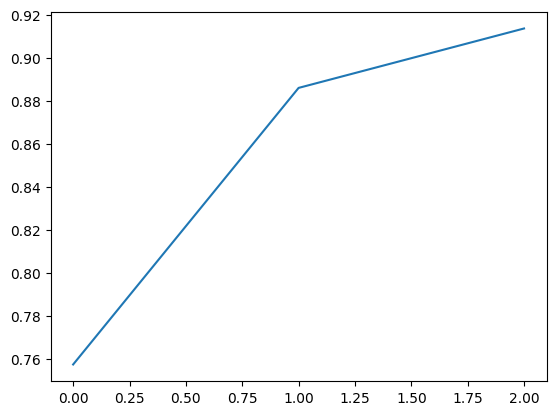

In [11]:
plt.plot(history.history['accuracy'],label=['Accuracy'])

In [26]:
def pred_sentiment(text):
  word_idx=tf.keras.datasets.imdb.get_word_index()
  word_idx={k:(v+3) for k,v in word_idx.items()}
  word_idx['<PAD>']=0
  word_idx['<START>']=1
  word_idx['<UNK>']=2
  word_idx['<UNUSED>']=3
  text=text.lower()
  words=text.split()
  seq=[1]
  for word in words:
    seq.append(word_idx.get(word,2))
  seq=pad_sequences([seq],maxlen=100)
  prediction=model.predict(seq)[0][0]
  sentiment = "Positive" if prediction > 0.5 else "Negative"
  # print(f"Sentiment: {sentiment} ({prediction:.4f})")
  return sentiment, prediction


In [27]:
pred_sentiment("Amazing movie")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


('Positive', np.float32(0.67814857))

In [35]:
import networkx as nx
G = nx.Graph()
G.add_node(0, text="The movie was wonderful and thrilling!")
G.add_node(1, text="It was a boring and slow film.")
G.add_node(2, text="Absolutely loved it!")
G.add_node(3, text="Terrible acting and poor direction.")
G.add_edges_from([(0, 2), (1, 3)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


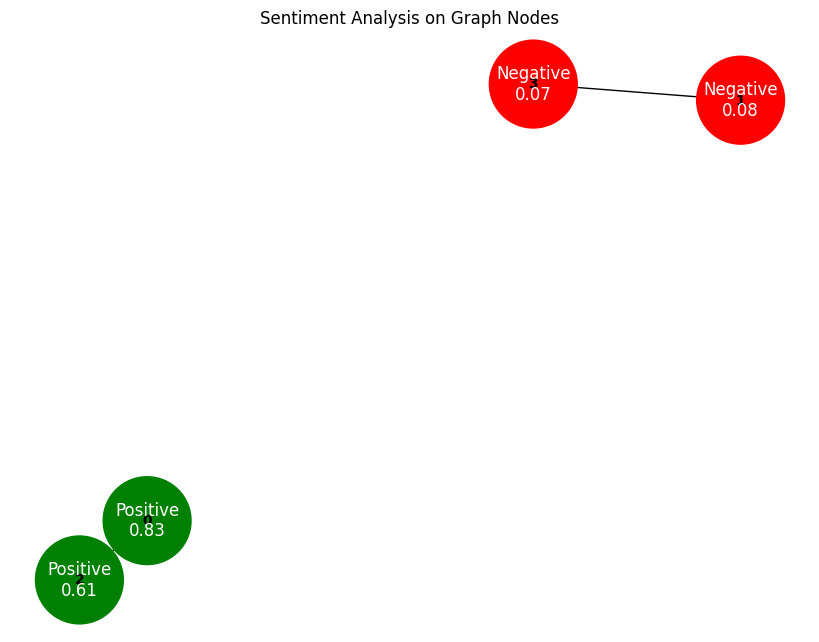

In [37]:
colors = []
labels = {}

for node in G.nodes:
    text = G.nodes[node]['text']
    sentiment, score = pred_sentiment(text)
    G.nodes[node]['sentiment'] = sentiment
    labels[node] = f"{sentiment}\n{score:.2f}"
    colors.append('green' if sentiment == "Positive" else 'red')

# -------- Plot Graph --------
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=4000, font_size=10, font_weight='bold')
nx.draw_networkx_labels(G, pos, labels=labels, font_color='white')
plt.title("Sentiment Analysis on Graph Nodes")
plt.show()